# Hola Alejandra!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

# Comentario General

~~Hola Alejandra, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas tener en cuenta para la siguiente entrega.~~ </div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

# Comentario General #2

Hola, Alejandra, te felicito por la culminación del proyecto. Realizaste un contenido de muy alta calidad, interesante y ordenado, además mostraste tu buen manejo de la temática y del uso de Python como herramienta de trabajo.  </div>

<div class="alert alert-block alert-info">
<b> INTRODUCCION: Analizando los datos en una gran tienda en línea. Junto con el departamento de marketing, se ha recopilado una lista de hipótesis orientadas a aumentar los ingresos de la empresa. El objetivo principal del proyecto es priorizar estas hipótesis mediante métodos analíticos y llevar a cabo un test A/B para analizar los resultados obtenidos. Esto permitirá fundamentar decisiones clave que impulsen el crecimiento del negocio.
Este análisis proporciona una guía estructurada para identificar y priorizar estrategias de crecimiento, así como para evaluar su efectividad a través de experimentos controlados. Los resultados permitirán a la empresa tomar decisiones informadas, optimizando los recursos y maximizando los ingresos.</b> <a class="tocSkip"></a>
</div>






# Parte 1. Priorizar hipótesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto.   </div>

In [2]:
# Cargar los datos
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=',')

# Verificar las primeras filas y las columnas
print(hypotheses.head())
print(hypotheses.columns)

# Si las columnas están combinadas, separarlas
if 'Hypothesis;Reach;Impact;Confidence;Effort' in hypotheses.columns:
    hypotheses = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)
    hypotheses.columns = ["Hypothesis", "Reach", "Impact", "Confidence", "Effort"]

# Asegurar que las columnas numéricas tengan el tipo correcto
hypotheses[["Reach", "Impact", "Confidence", "Effort"]] = hypotheses[["Reach", "Impact", "Confidence", "Effort"]].apply(pd.to_numeric)

# Usar info para verificar el estado del DataFrame
hypotheses.info()
hypotheses


           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...
Index(['Hypothesis;Reach;Impact;Confidence;Effort'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando el dataset con información de las hipótesis, así mismo realizando modificaciones sobre este y explorando de manera inicial el contenido.   </div>

In [3]:
# Calcular ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por ICE en orden descendente
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar resultados ordenados por ICE
print("Priorización por ICE:")
print(hypotheses_ice[['Hypothesis', 'ICE']])

Priorización por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [4]:
# Calcular RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por RICE en orden descendente
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar resultados ordenados por RICE
print("Priorización por RICE:")
print(hypotheses_rice[['Hypothesis', 'RICE']])

Priorización por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [5]:
# Ordenar por ICE en orden descendente y asignar rangos
hypotheses['ICE Rank'] = hypotheses['ICE'].rank(ascending=False)

# Ordenar por RICE en orden descendente y asignar rangos
hypotheses['RICE Rank'] = hypotheses['RICE'].rank(ascending=False)

# Mostrar las primeras filas para verificar
#print(hypotheses.head())
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE,ICE Rank,RICE Rank
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0,2.0,3.5
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0,6.0,7.5
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0,5.0,2.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0,8.0,6.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0,9.0,9.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0,7.0,7.5
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0,4.0,3.5
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0,3.0,1.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2,1.0,5.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo desplegando y estudiando los frameworks RICE e ICE. Asimismo mismo buen trabajo priorizando las hipótesis sujetas a los resultados obtenidos.    </div>

CONCLUSION: Orden de prioridad según ICE:

Hipótesis con mayor prioridad: "Launch a promotion that gives users discounts..." (ICE Rank: 1.0).
Factores clave: Impacto y confianza altos (9 cada uno) y un esfuerzo relativamente bajo (5).
Orden de prioridad según RICE:

Hipótesis con mayor prioridad: "Add a subscription form to all the main pages..." (RICE Rank: 1.0).
Factores clave: Alcance extremadamente alto (10), combinado con buen impacto (7) y confianza (8).
Comparación entre ICE y RICE:

Las hipótesis con un alto Reach (alcance) tienden a obtener mejores posiciones en RICE. Por ejemplo:
"Add a subscription form to all the main pages..." sube al puesto 1 en RICE gracias a su alto Reach, mientras que en ICE está en el puesto 3.
Las hipótesis con un alcance bajo se ven penalizadas en RICE. Por ejemplo:
"Launch a promotion that gives users discounts..." baja del puesto 1 en ICE al puesto 5 en RICE debido a su bajo Reach (1).


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo.    </div>

# Parte 2. Análisis del test A/B

## Analiza el test A/B:

### (1.) Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [6]:
orders= pd.read_csv('/datasets/orders_us.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [7]:
print(orders.columns)


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')


In [8]:
visits= pd.read_csv('/datasets/visits_us.csv')
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
print(visits.columns)


Index(['date', 'group', 'visits'], dtype='object')


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando y explorando de manera inicial el contenido del dataset. 

#TODO LO ANTERIOR OK, REVISAR SI LO QUE SIGUE ES NECESARIO ESTÉ EN EL CÓDIGO

In [10]:
# Convertir 'date' al formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Eliminar duplicados
orders = orders.drop_duplicates()
visits = visits.drop_duplicates()

# Identificar usuarios en ambos grupos
user_groups = orders.groupby('visitorId')['group'].nunique()
users_in_both_groups = user_groups[user_groups > 1].index

# Filtrar usuarios duplicados
orders = orders[~orders['visitorId'].isin(users_in_both_groups)]

# Verificar datos después del preprocesamiento
print(orders.info())
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo modificando tipos de datos de los datasets. Por otro lado, muy buen trabajo realizando la identificación y eliminación de los usuarios que están repetidos en los dos grupos. Esta transformación es clave para llegar a conclusiones correctas en el análisis de test a/b </div>

In [11]:
# Calcular ingresos acumulados por grupo
cumulative_revenue = (
    orders.groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .rename(columns={'revenue': 'daily_revenue', 'transactionId': 'daily_orders'})
    .reset_index()
)

# Agregar ingresos acumulados
cumulative_revenue['cumulative_revenue'] = (
    cumulative_revenue.groupby('group')['daily_revenue'].cumsum()
)

print(cumulative_revenue.head())


        date group  daily_revenue  daily_orders  cumulative_revenue
0 2019-08-01     A         2266.6            23              2266.6
1 2019-08-01     B          967.2            17               967.2
2 2019-08-02     A         1468.3            19              3734.9
3 2019-08-02     B         2568.1            23              3535.3
4 2019-08-03     A         1815.2            24              5550.1


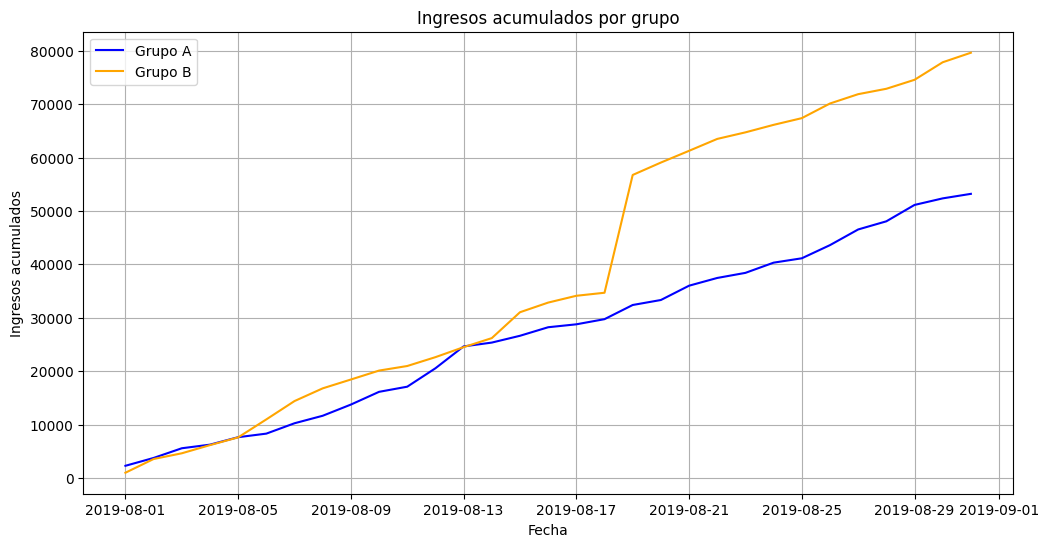

In [12]:
import matplotlib.pyplot as plt

# Pivotear la tabla para graficar más fácilmente
cumulative_pivot = cumulative_revenue.pivot(index='date', columns='group', values='cumulative_revenue')

# Gráfica de ingresos acumulados
plt.figure(figsize=(12, 6))
plt.plot(cumulative_pivot.index, cumulative_pivot['A'], label='Grupo A', color='blue')
plt.plot(cumulative_pivot.index, cumulative_pivot['B'], label='Grupo B', color='orange')
plt.title('Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.legend()
plt.grid()
plt.show()


El análisis de los ingresos acumulados revela que el grupo A lidera inicialmente, pero el grupo B está reduciendo rápidamente la brecha gracias a un crecimiento más rápido. Si esta tendencia continúa, B podría alcanzar o superar a A en pocos días. Este comportamiento podría depender de factores como estrategias de venta, precios, promociones, o la cantidad y valor promedio de las órdenes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo estructurando este gráfico de los ingresos acumulados por grupo. </div>

### (2.) Representa gráficamente el tamaño de pedido promedio acumulado por grupo. 

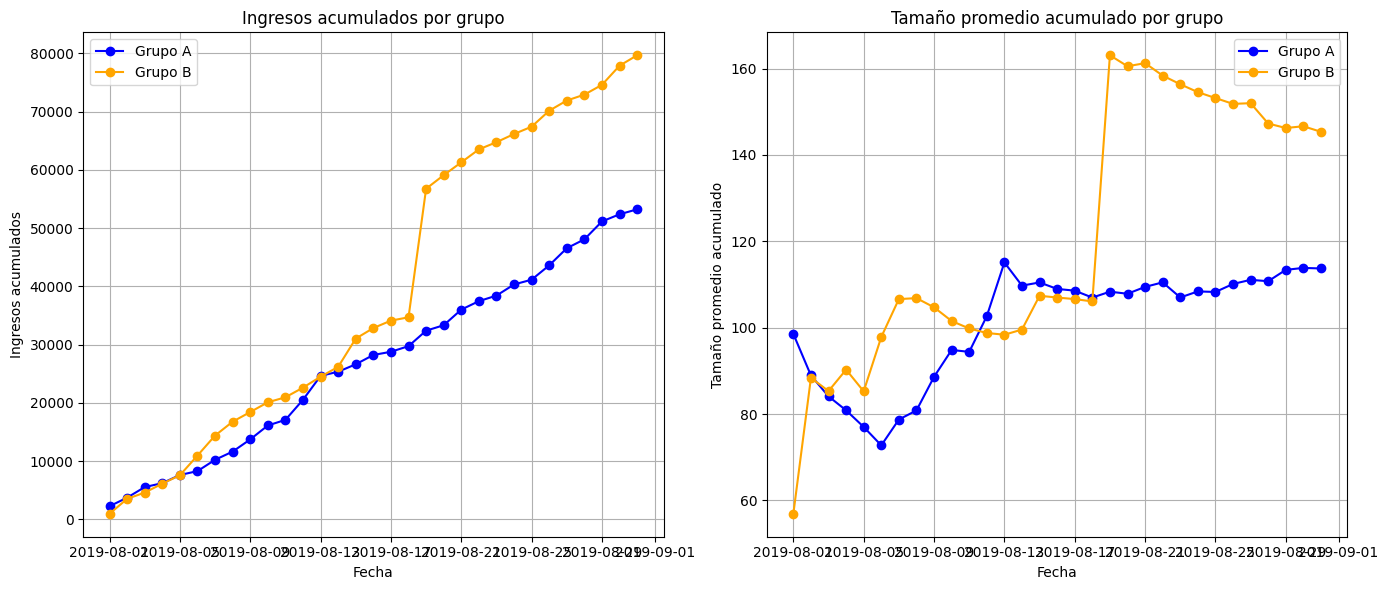

Tabla pivotada de ingresos acumulados:
group             A        B
date                        
2019-08-01   2266.6    967.2
2019-08-02   3734.9   3535.3
2019-08-03   5550.1   4606.9
2019-08-04   6225.6   6138.5
2019-08-05   7623.6   7587.8
2019-08-06   8292.0  10957.1
2019-08-07  10234.0  14392.7
2019-08-08  11638.8  16772.6
2019-08-09  13734.0  18428.8
2019-08-10  16121.5  20103.6
2019-08-11  17084.9  20959.0
2019-08-12  20533.7  22616.8
2019-08-13  24630.6  24491.3
2019-08-14  25347.2  26183.7
2019-08-15  26622.5  31033.2
2019-08-16  28221.6  32840.2
2019-08-17  28770.1  34116.2
2019-08-18  29735.7  34684.7
2019-08-19  32389.3  56749.6
2019-08-20  33325.3  59074.2
2019-08-21  36004.2  61274.4
2019-08-22  37455.1  63503.9
2019-08-23  38409.2  64732.8
2019-08-24  40321.3  66138.5
2019-08-25  41139.5  67393.8
2019-08-26  43604.3  70138.1
2019-08-27  46539.0  71885.0
2019-08-28  48065.9  72895.5
2019-08-29  51134.8  74576.7
2019-08-30  52363.7  77863.5
2019-08-31  53212.0  79651.2

Tab

In [13]:
# Calcular ingresos acumulados por grupo
cumulative_revenue = (
    orders.groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .rename(columns={'revenue': 'daily_revenue', 'transactionId': 'daily_orders'})
    .reset_index()
)

# Agregar ingresos acumulados
cumulative_revenue['cumulative_revenue'] = (
    cumulative_revenue.groupby('group')['daily_revenue'].cumsum()
)

# Agregar pedidos acumulados
cumulative_revenue['cumulative_orders'] = (
    cumulative_revenue.groupby('group')['daily_orders'].cumsum()
)

# Calcular el tamaño promedio acumulado
cumulative_revenue['avg_order_value'] = (
    cumulative_revenue['cumulative_revenue'] / cumulative_revenue['cumulative_orders']
)

# Pivotear la tabla para ingresos acumulados
cumulative_pivot_revenue = cumulative_revenue.pivot(index='date', columns='group', values='cumulative_revenue')

# Pivotear la tabla para tamaño de pedido promedio acumulado
cumulative_pivot_avg_order = cumulative_revenue.pivot(index='date', columns='group', values='avg_order_value')

# Gráfica de ingresos acumulados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cumulative_pivot_revenue.index, cumulative_pivot_revenue['A'], label='Grupo A', color='blue', marker='o')
plt.plot(cumulative_pivot_revenue.index, cumulative_pivot_revenue['B'], label='Grupo B', color='orange', marker='o')
plt.title('Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.legend()
plt.grid()

# Gráfica de tamaño promedio acumulado
plt.subplot(1, 2, 2)
plt.plot(cumulative_pivot_avg_order.index, cumulative_pivot_avg_order['A'], label='Grupo A', color='blue', marker='o')
plt.plot(cumulative_pivot_avg_order.index, cumulative_pivot_avg_order['B'], label='Grupo B', color='orange', marker='o')
plt.title('Tamaño promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio acumulado')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Mostrar la pivot table de ingresos acumulados
print("Tabla pivotada de ingresos acumulados:")
print(cumulative_pivot_revenue)

# Mostrar la pivot table de tamaño promedio acumulado
print("\nTabla pivotada de tamaño promedio acumulado:")
print(cumulative_pivot_avg_order)

Ambos grupos tanto el A como el B muestran un comportamiento positivo pero con el avance del tiempo hay un aumento notable en el comportamiento del grupo B.
El aumento notable en el tamaño promedio acumulado del grupo B podría indicar que la estrategia aplicada a este grupo (en el contexto de una prueba A/B) está teniendo un impacto positivo en el valor promedio de los pedidos.Los resultados podrían apoyar la idea de que la intervención o estrategia aplicada al grupo B es más efectiva para aumentar el tamaño promedio acumulado por pedido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo con el despliegue del gráfico de tamaño de pedido promedio acumulado por grupo y así mismo con la comparación del comportamiento de los ingresos acumulados. </div>

### (3.)	Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 

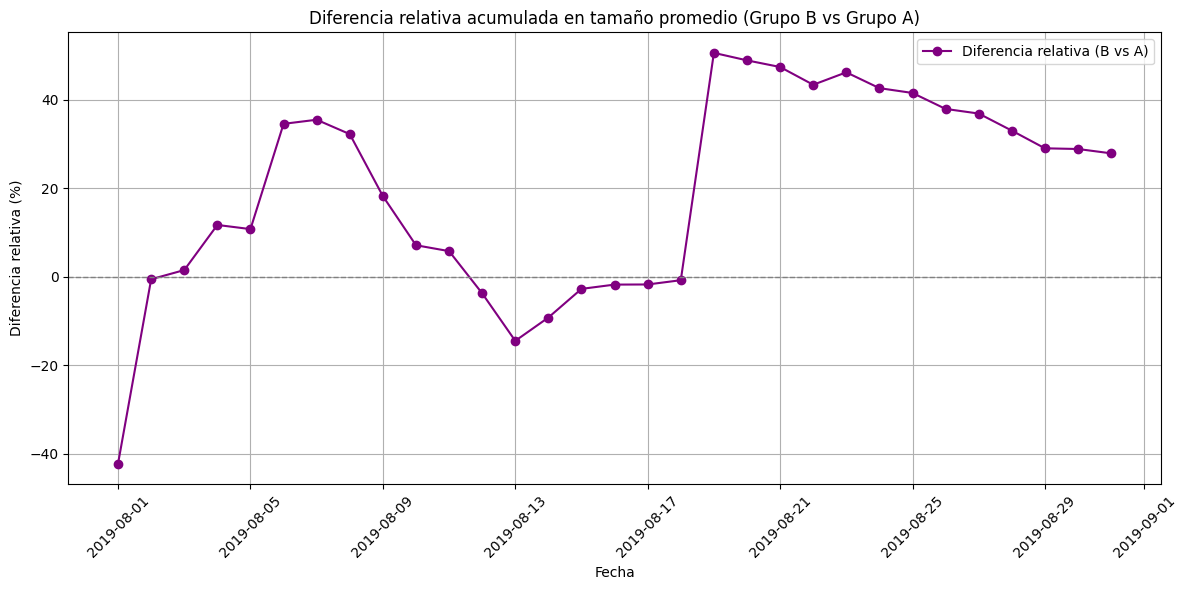

In [14]:
# Calcular la diferencia relativa entre los grupos B y A
cumulative_pivot_avg_order['relative_difference'] = (
    (cumulative_pivot_avg_order['B'] - cumulative_pivot_avg_order['A']) / cumulative_pivot_avg_order['A'] * 100
)

# Gráfica de la diferencia relativa
plt.figure(figsize=(12, 6))
plt.plot(
    cumulative_pivot_avg_order.index,
    cumulative_pivot_avg_order['relative_difference'],
    label='Diferencia relativa (B vs A)',
    color='purple',
    marker='o'
)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Línea de referencia en 0
plt.title('Diferencia relativa acumulada en tamaño promedio (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Mostrar la tabla de diferencia relativa
#print("\nTabla con la diferencia relativa:")
#print(cumulative_pivot_avg_order[['A', 'B', 'relative_difference']])

Es posible que el grupo B haya respondido mejor a una promoción inicial, lo que explica los valores positivos de la diferencia relativa al principio.Sin embargo, las estrategias para el grupo B no parecen haber sido sostenibles, ya que la diferencia relativa acumulada se reduce al final del período.
Los cambios abruptos y la alta variabilidad sugieren que factores externos o condiciones aleatorias afectaron los resultados del experimento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo realizando el cálculo y desplegando el gráfico de la diferencia relativa acumulada entre los tamaños de pedido promedio de los grupos. </div>

### (4.) Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

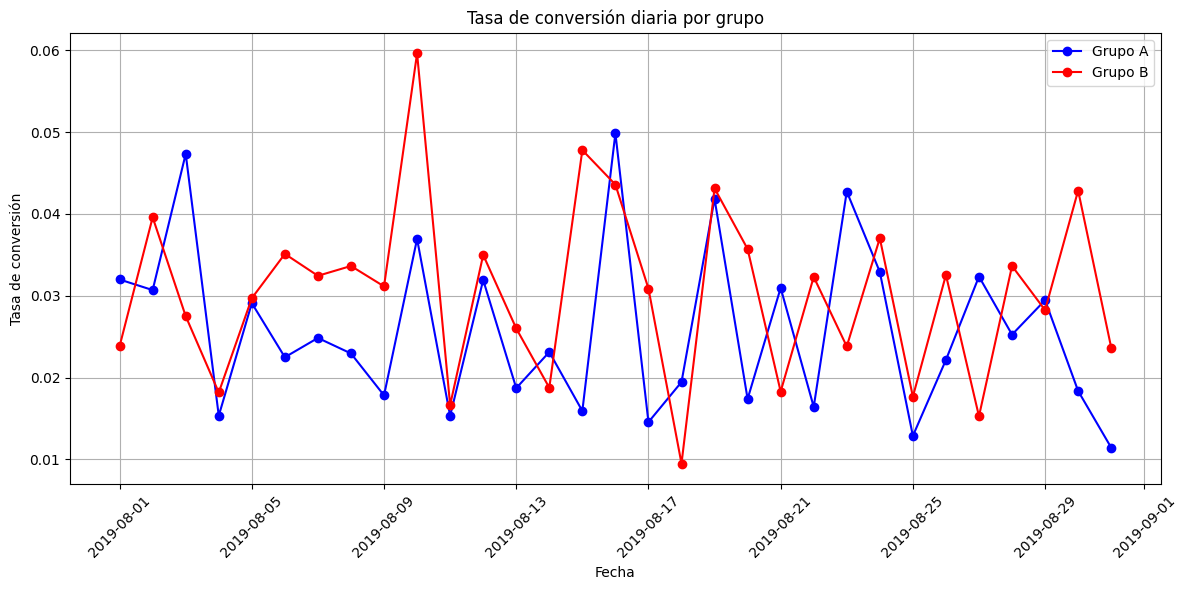

        date group  orders  visits  conversion_rate
0 2019-08-01     A      23     719         0.031989
1 2019-08-01     B      17     713         0.023843
2 2019-08-02     A      19     619         0.030695
3 2019-08-02     B      23     581         0.039587
4 2019-08-03     A      24     507         0.047337


In [15]:
# Calcular el número de pedidos por día y por grupo
orders_by_day = orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
orders_by_day.rename(columns={'transactionId': 'orders'}, inplace=True)

# Calcular el número de visitas por día y por grupo
visits_by_day = visits.groupby(['date', 'group'])['visits'].sum().reset_index()

# Combinar los datos de pedidos y visitas
conversion_data = pd.merge(orders_by_day, visits_by_day, on=['date', 'group'])

# Calcular la tasa de conversión (pedidos / visitas)
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']

# Graficar las tasas de conversión diarias para los dos grupos
plt.figure(figsize=(12, 6))

# Graficar tasa de conversión para el grupo A
group_a = conversion_data[conversion_data['group'] == 'A']
plt.plot(group_a['date'], group_a['conversion_rate'], label='Grupo A', color='blue', marker='o')

# Graficar tasa de conversión para el grupo B
group_b = conversion_data[conversion_data['group'] == 'B']
plt.plot(group_b['date'], group_b['conversion_rate'], label='Grupo B', color='red', marker='o')

plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Mostrar las primeras filas de los datos de tasa de conversión
print(conversion_data.head())

Ambas tasas de conversión presentan fluctuaciones diarias significativas.
El grupo B muestra picos más altos de tasa de conversión, alcanzando valores cercanos al 6% en algunos días, mientras que el grupo A parece mantenerse más estable, aunque con algunas caídas notorias.
Sin una tendencia clara de cuál grupo domina constantemente, es posible que se necesiten análisis adicionales para determinar si las diferencias son estadísticamente significativas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo con el cálculo y despliegue del gráfico de las tasas de conversión diarias por grupo. <div>

  ###  (5.)	Traza un gráfico de dispersión del número de pedidos por usuario. 

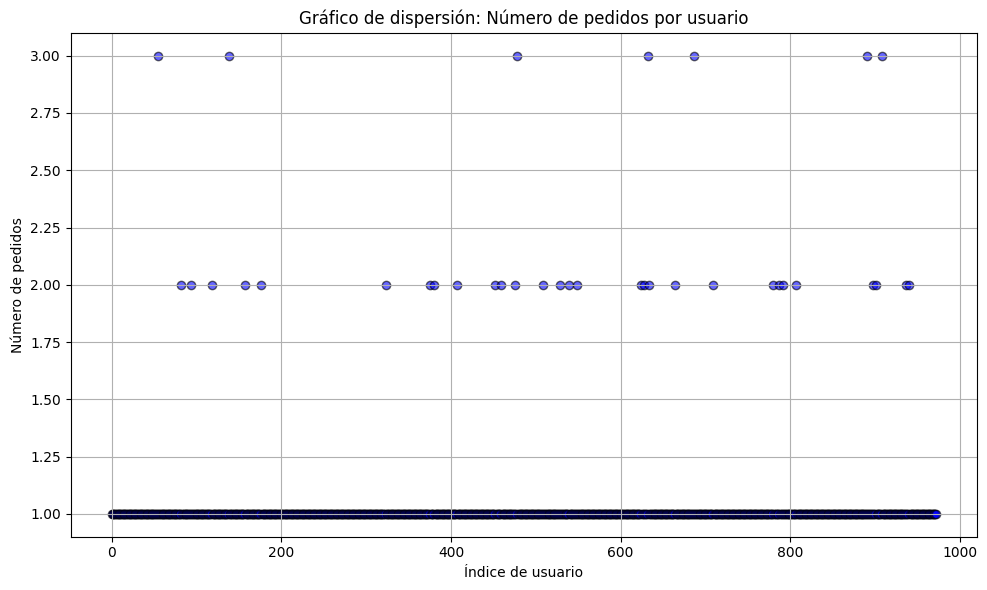

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64


In [16]:

# Calcular el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user.rename(columns={'transactionId': 'orders'}, inplace=True)

# Graficar el número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user.index, orders_per_user['orders'], alpha=0.6, color='blue', edgecolor='k')
plt.title('Gráfico de dispersión: Número de pedidos por usuario')
plt.xlabel('Índice de usuario')
plt.ylabel('Número de pedidos')
plt.grid()
plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print(orders_per_user['orders'].describe())

La mayoría de los puntos en la gráfica están alineados en el valor de "1" en el eje y, indicando que la gran mayoría de los usuarios realizaron solo un pedido. Existen algunos puntos dispersos en valores de "2" y "3" en el eje y. Esto indica que hay usuarios que realizaron dos o tres pedidos, pero estos casos son significativamente menos frecuentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo desplegando el scatter para estudiar la dispersión del número de pedidos por cliente. </div>

###    (6.)	Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [17]:
import numpy as np

# Calcular el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique()

# Calcular los percentiles 95 y 99
percentile_95 = np.percentile(orders_per_user, 95)
percentile_99 = np.percentile(orders_per_user, 99)

# Imprimir resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

# Definir el punto de anomalía
anomaly_threshold = percentile_99
print(f"Cualquier usuario con más de {anomaly_threshold} pedidos puede considerarse una anomalía.")

Percentil 95: 1.0
Percentil 99: 2.0
Cualquier usuario con más de 2.0 pedidos puede considerarse una anomalía.


 El 95% de los usuarios realizaron 1 pedido o menos. Solo el 5% de los usuarios realizaron más de 1 pedido. Esto indica que la mayoría de los usuarios tienen un comportamiento típico de realizar 1 pedido.
 El 99% de los usuarios realizaron 2 pedidos o menos. Solo el 1% de los usuarios realizaron más de 2 pedidos. Este grupo es mucho más pequeño y representa un comportamiento más raro o atípico.
 
 

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo con el calculo de los percentiles.  </div>

### (7.)	Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

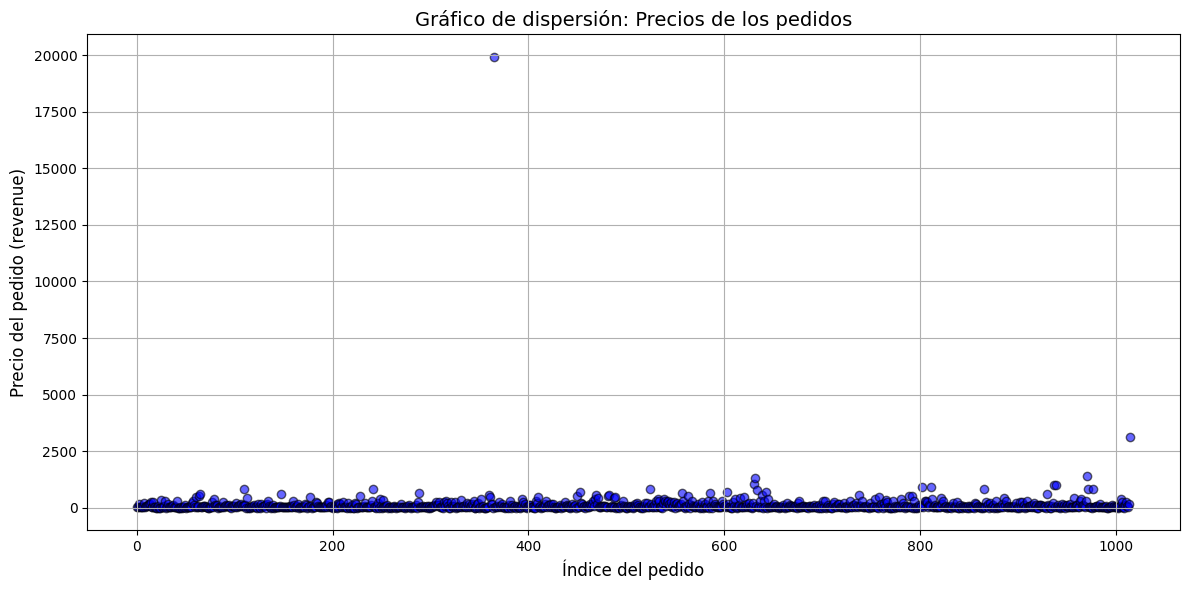

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.6, color='blue', edgecolors='black')

# Personalizar el gráfico
plt.title('Gráfico de dispersión: Precios de los pedidos', fontsize=14)
plt.xlabel('Índice del pedido', fontsize=12)
plt.ylabel('Precio del pedido (revenue)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La mayoría de los puntos están agrupados cerca de un rango específico, eso indica que los precios de los pedidos tienden a ser consistentes.Esto indica que la mayoría de los ingresos por pedido no son muy elevados. Presencia de Outliers: Un punto en particular parece ser un pedido con un precio extremadamente alto (alrededor de 20,000), que podría considerarse una anomalía o un caso especial.



<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo desplegando el scatter para estudiar la dispersión del precio de los pedidos. </div>

### (8.) Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [19]:
import numpy as np

# Calcular los percentiles 95 y 99 del precio de los pedidos (revenue)
percentile_95 = np.percentile(orders['revenue'], 95)
percentile_99 = np.percentile(orders['revenue'], 99)

# Imprimir los resultados
print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

# Definir el umbral de anomalía (más allá del percentil 99)
print(f"Cualquier pedido con un precio mayor a {percentile_99} puede considerarse una anomalía.")


Percentil 95: 414.275
Percentil 99: 830.3
Cualquier pedido con un precio mayor a 830.3 puede considerarse una anomalía.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo con el calculo de los percentiles.  </div>

<div class="alert alert-block alert-info">
<b>Respuesta a la primera revisión. En la sección de pruebas de significancia estadístic cargué de nuevo los datos porque tuve la confusión de como decía datos en bruto, no sabía si se refería a los datos originales los raw data, hago la corrección omitiendo las bases de datos, que ya había cargado con anterioridad. 
No cambia la respuesta de , "Parar la prueba y concluir que no hay diferencia estadísticamente significativa entre los grupos".</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Entiendo la confusión, como recomendación para ocasiones futuras es que puedes crear copias de los datasets originales usando el método ``copy()``, de este modo puedes manejar diferentes versiones según lo que se requiera y evitar volver a cargar los datos desde 0. 
</div>

### (9.)	Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

In [20]:
#import pandas as pd
from scipy.stats import mannwhitneyu


# 2. Calcular la conversión por grupo
# Contar los pedidos por grupo
orders_per_group = orders.groupby('group')['visitorId'].nunique()

# Calcular el total de visitas por grupo
visits_per_group = visits.groupby('group')['visits'].sum()

# Calcular la tasa de conversión por grupo
conversion_rate = orders_per_group / visits_per_group
print("Tasa de conversión por grupo:")
print(conversion_rate)

# 3. Preparar datos para la prueba estadística
# Extraer los datos de pedidos por usuario en cada grupo
group_a_orders = orders[orders['group'] == 'A']['visitorId'].value_counts()
group_b_orders = orders[orders['group'] == 'B']['visitorId'].value_counts()

# Asegurarse de que cada visitante tenga un registro, incluso si no realizó pedidos
# Crear índices únicos basados en los visitantes que realizaron pedidos
unique_visitors_a = orders[orders['group'] == 'A']['visitorId'].unique()
unique_visitors_b = orders[orders['group'] == 'B']['visitorId'].unique()

group_a_orders = group_a_orders.reindex(unique_visitors_a, fill_value=0)
group_b_orders = group_b_orders.reindex(unique_visitors_b, fill_value=0)

# 4. Prueba estadística (Mann-Whitney U test)
stat, p_value = mannwhitneyu(group_a_orders, group_b_orders, alternative='two-sided')

# 5. Conclusiones
print("\nResultados de la prueba de Mann-Whitney U:")
print(f"Estadístico U: {stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en las tasas de conversión entre los grupos A y B.")

Tasa de conversión por grupo:
group
A    0.023751
B    0.027913
dtype: float64

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 118254.0
Valor p: 0.5880266909361814
No hay una diferencia significativa en las tasas de conversión entre los grupos A y B.


Grupo A: 0.0237521 (aproximadamente 2.37% de conversión).
Grupo B: 0.030979 (aproximadamente 3.09% de conversión).
Estadístico U: 118254.0.
Valor p: 0.588, que es mucho mayor que el umbral de significancia típico de 0.05.


Dado que el valor p es 0.588, lo que es mayor que 0.05, no hay una diferencia significativa en las tasas de conversión entre los grupos A y B.
    

### (10.) Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [24]:




# 2. Calcular el tamaño promedio de pedido por grupo
avg_order_size = orders.groupby('group')['revenue'].mean()
print("Tamaño promedio de pedido por grupo:")
print(avg_order_size)

# 3. Preparar datos para la prueba estadística
# Extraer los ingresos (`revenue`) por pedido para cada grupo
group_a_revenue = orders[orders['group'] == 'A']['revenue']
group_b_revenue = orders[orders['group'] == 'B']['revenue']

# 4. Prueba estadística (Mann-Whitney U test)
stat, p_value = mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')

# 5. Conclusiones
print("\nResultados de la prueba de Mann-Whitney U:")
print(f"Estadístico U: {stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")

Tamaño promedio de pedido por grupo:
group
A    115.897487
B    145.063437
Name: revenue, dtype: float64

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 175872.5
Valor p: 0.6915246773264736
No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


Tamaño promedio de pedido por grupo:
Grupo A: $115.89
Grupo B: $145.06

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 175872.5
Valor p: 0.6915

El valor p es 0.6915, que es mucho mayor que el umbral de significancia común de 0.05. Esto indica que no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los dos grupos. 

Con base en los resultados de la prueba estadística, no hay evidencia suficiente para afirmar que existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.Con base en los resultados de la prueba estadística, no hay evidencia suficiente para afirmar que existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


### (11.)	Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [25]:

# 2. Calcular el tamaño promedio de pedido por grupo
avg_order_size = orders.groupby('group')['revenue'].mean()
print("Tamaño promedio de pedido por grupo:")
print(avg_order_size)

# 3. Preparar datos para la prueba estadística
# Extraer los ingresos (`revenue`) por pedido para cada grupo
group_a_revenue = orders[orders['group'] == 'A']['revenue']
group_b_revenue = orders[orders['group'] == 'B']['revenue']

# 4. Prueba estadística (Mann-Whitney U test)
stat, p_value = mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')

# 5. Conclusiones
print("\nResultados de la prueba de Mann-Whitney U:")
print(f"Estadístico U: {stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.")

Tamaño promedio de pedido por grupo:
group
A    115.897487
B    145.063437
Name: revenue, dtype: float64

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 175872.5
Valor p: 0.6915246773264736
No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.


Tamaño promedio de pedido por grupo:
Grupo A:  115.89
Grupo B: 145.06
Resultados de la prueba de Mann-Whitney U:
Estadístico U: 175872.5 Valor p: 0.6915 El valor p obtenido es 0.6915, que es mucho mayor que el umbral común de 0.05 para significancia estadística. Esto indica que no hay una diferencia estadísticamente significativa entre los tamaños promedio de pedido de los grupos A y B.

Con base en el valor p 0.6915, se concluye que no hay evidencia suficiente para afirmar que las tasas de conversión entre los grupos A y B sean significativamente diferentes.


### (12.) Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [26]:

# 2. Filtrar los datos
# Incluir solo pedidos realizados después de '2019-01-01' y con ingresos mayores a 50
filtered_orders = orders[(orders['date'] >= '2019-01-01') & (orders['revenue'] > 50)]

# 3. Calcular el tamaño promedio de pedido por grupo
# Agrupar por grupo y calcular el promedio de revenue
avg_order_size = filtered_orders.groupby('group')['revenue'].mean()
print("Tamaño promedio de pedido por grupo (datos filtrados):")
print(avg_order_size)

# 4. Preparar datos para la prueba estadística
# Extraer los ingresos individuales (revenue) por grupo
group_a_revenue = filtered_orders[filtered_orders['group'] == 'A']['revenue']
group_b_revenue = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# 5. Prueba estadística (Mann-Whitney U test)
stat, p_value = mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')

# 6. Conclusiones
print("\nResultados de la prueba de Mann-Whitney U (datos filtrados):")
print(f"Estadístico U: {stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B (datos filtrados).")
else:
    print("No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B (datos filtrados).")

Tamaño promedio de pedido por grupo (datos filtrados):
group
A    206.287633
B    261.959509
Name: revenue, dtype: float64

Resultados de la prueba de Mann-Whitney U (datos filtrados):
Estadístico U: 46652.5
Valor p: 0.8091602018339863
No hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B (datos filtrados).


Aunque existe una diferencia en el tamaño promedio de los pedidos entre los dos grupos, esta diferencia no es significativa desde el punto de vista estadístico.

### (13.)	Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Basado en los resultados, lo más apropiado sería la opción 2: Parar la prueba y concluir que no hay diferencia entre los grupos.

Razón:Todas las pruebas muestran valores p muy por encima del umbral de 0.05.
Las diferencias observadas no son estadísticamente significativas.